# Laporan Proyek Machine Learning - [Haekal Hasan Thanvindra]

## Domain Proyek

**Latar Belakang**

Industri properti merupakan salah satu sektor yang sangat dinamis dan dipengaruhi oleh banyak faktor seperti lokasi, ukuran bangunan, fasilitas, hingga kondisi lingkungan. Dataset yang digunakan dalam proyek ini mencakup fitur-fitur seperti luas rumah, jumlah kamar tidur dan kamar mandi, ukuran garasi, serta kualitas lingkungan, yang kesemuanya memengaruhi harga rumah secara signifikan.

Bagi agen properti, investor, dan calon pembeli, kemampuan untuk memprediksi harga rumah secara akurat sangat penting untuk pengambilan keputusan. Dengan semakin tersedianya data historis penjualan rumah dan informasi karakteristik properti yang detail, teknologi machine learning memberikan peluang untuk membangun model prediktif yang mampu memproyeksikan harga rumah berdasarkan fitur-fitur tersebut.

**Kenapa Masalah Ini Harus Diselesaikan**

Menentukan harga rumah yang sesuai dengan nilai pasar sangat krusial, baik untuk menghindari kerugian karena undervaluation maupun untuk menjaga daya saing jika terjadi overpricing. Prediksi harga rumah dapat membantu:

- Calon pembeli untuk mengetahui harga pasar yang wajar
- Agen properti untuk menentukan strategi harga
- Investor untuk mengidentifikasi properti yang menguntungkan

Referensi Pendukung
- C. R. Madhuri, G. Anuradha and M. V. Pujitha, "House Price Prediction Using Regression Techniques: A Comparative Study," 2019 International Conference on Smart Structures and Systems (ICSSS), Chennai, India, 2019, pp. 1-5, doi: 10.1109/ICSSS.2019.8882834. [Link](https://ieeexplore.ieee.org/abstract/document/8882834)

## Business Understanding

### Problem Statements
- Bagaimana memanfaatkan data historis penjualan rumah untuk memprediksi harga rumah di masa mendatang?
- Apa saja fitur (variabel) yang paling berpengaruh terhadap harga rumah?

### Goals
- Membangun model Machine Learning untuk memprediksi harga rumah berdasarkan fitur-fitur yang tersedia.
- Mengidentifikasi fitur paling penting yang memengaruhi harga rumah.

### Solution Statements
- Membangun dua model regresi menggunakan Linear Regression dan Random Forest Regressor, lalu membandingkan performa keduanya.
- Evaluasi performa model dilakukan menggunakan metrik Root Mean Squared Error (RMSE) dan R-squared (R²).

## Data Understanding

Dataset yang digunakan dalam proyek ini adalah House Price Regression Dataset yang diperoleh dari platform Kaggle. Dataset ini berisi informasi tentang penjualan rumah dengan total 1000 baris data dan 8 fitur yang merepresentasikan karakteristik rumah beserta harga jualnya (House_Price) sebagai target prediksi. Dataset dapat diakses melalui tautan berikut: [House Price Regression Dataset](https://www.kaggle.com/datasets/prokshitha/home-value-insights)

**Variabel-variabel pada dataset ini adalah sebagai berikut:**
- **Square_Footage**: Ukuran rumah dalam satuan kaki persegi (square feet). Rumah yang lebih luas umumnya memiliki harga yang lebih tinggi.
- **Num_Bedrooms**: Jumlah kamar tidur pada rumah.
- **Num_Bathrooms**: Jumlah kamar mandi pada rumah.
- **Year_Built**: Tahun rumah dibangun. Rumah yang lebih tua dapat memiliki harga yang berbeda tergantung kondisi.
- **Lot_Size**: Ukuran lahan tempat rumah berdiri, dalam satuan acre. Lahan yang lebih luas cenderung menambah nilai rumah.
- **Garage_Size**: Kapasitas garasi dalam jumlah mobil yang bisa ditampung.
- **Neighborhood_Quality**: Skor kualitas lingkungan tempat rumah berada, dengan rentang 1 sampai 10, di mana angka lebih tinggi menandakan lingkungan yang lebih baik.
- **House_Price**: Harga rumah (target variabel yang ingin diprediksi).

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Dataset
df = pd.read_csv('/content/house_data.csv')

In [3]:
# Tampilkan 5 baris pertama untuk melihat data
print("5 data teratas:")
print(df.head())

5 data teratas:
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


In [4]:
# Info data: jumlah baris, kolom, tipe data tiap kolom, dan jumlah non-null
print("\nInfo dataset:")
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None


In [5]:
# Statistik deskriptif fitur numerik
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000          

In [6]:
# Cek missing values per kolom
print("\nMissing values per kolom:")
print(df.isnull().sum())


Missing values per kolom:
Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


**Insight**:
- Rata-rata luas rumah (Square_Footage) adalah sekitar 2815 sq.ft dengan rentang mulai dari 503 hingga 4999 sq.ft.
- Jumlah kamar tidur (Num_Bedrooms) berkisar antara 1 sampai 5 kamar, dengan rata-rata hampir 3 kamar.
- Harga rumah (House_Price) memiliki rata-rata sekitar 618,861 dengan variasi yang cukup besar dari sekitar 111,629 hingga 1,108,237.
- Tidak ditemukan nilai yang hilang (missing values) pada seluruh fitur, sehingga dataset sudah cukup bersih untuk analisis lebih lanjut.

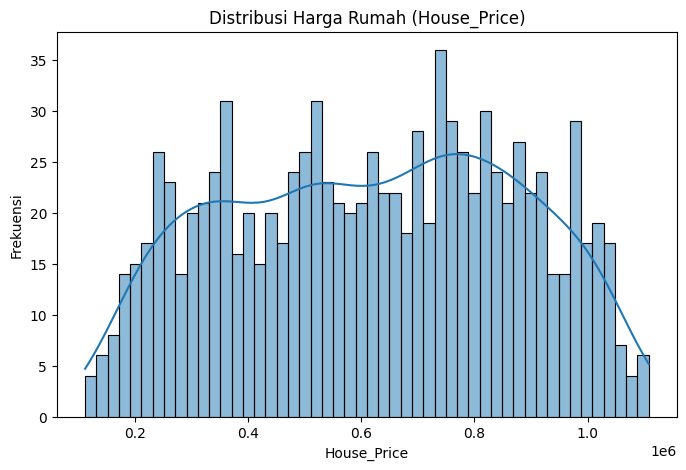

In [7]:
# Visualisasi distribusi target House_Price
plt.figure(figsize=(8,5))
sns.histplot(df['House_Price'], bins=50, kde=True)
plt.title('Distribusi Harga Rumah (House_Price)')
plt.xlabel('House_Price')
plt.ylabel('Frekuensi')
plt.show()

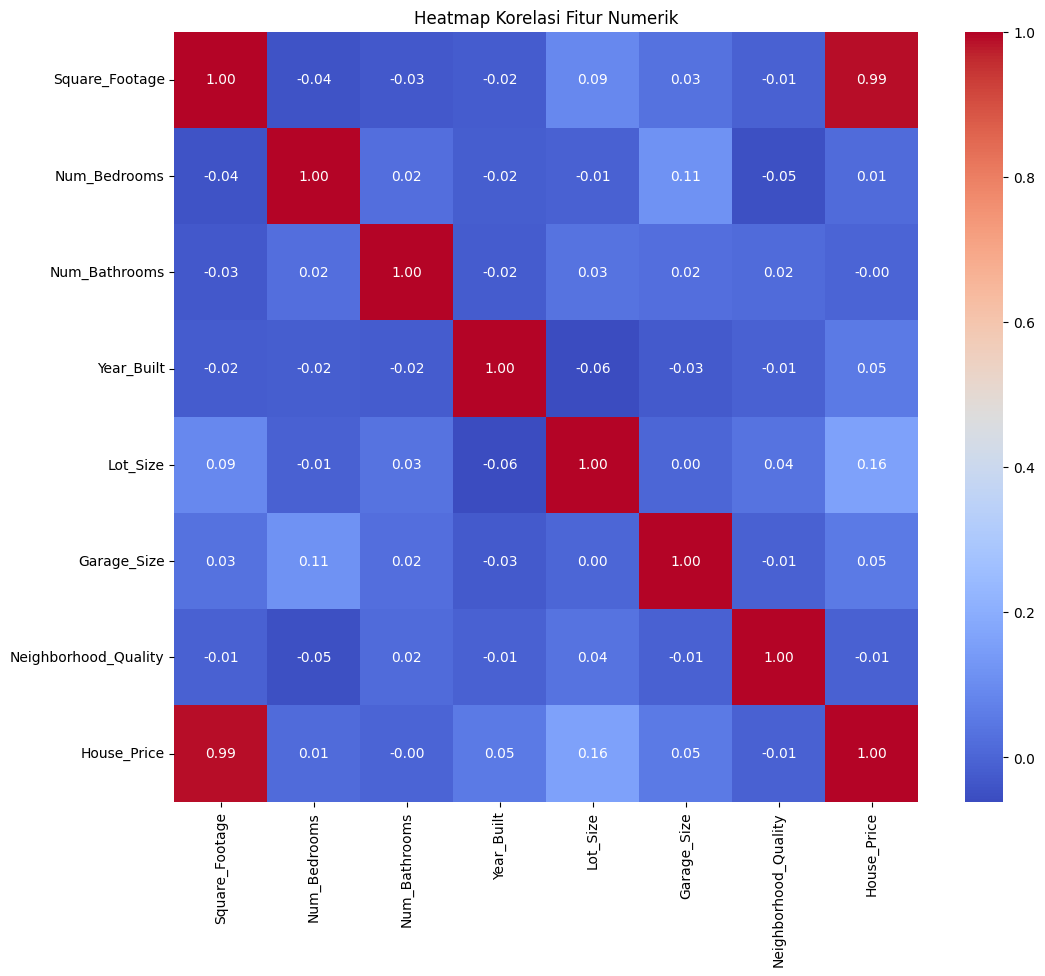

In [8]:
# Visualisasi korelasi antar fitur numerik
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

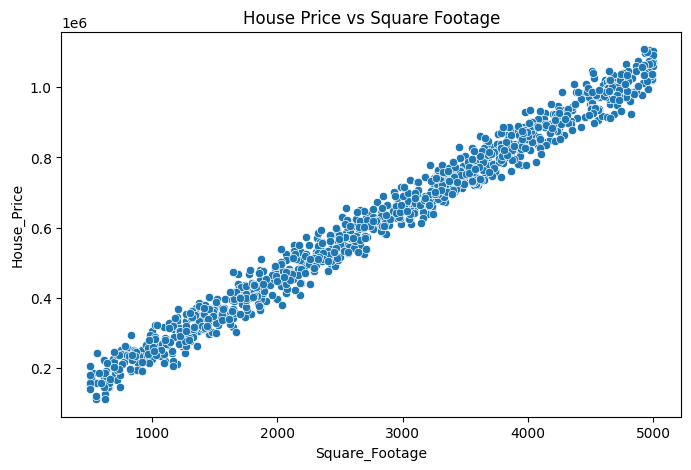

In [9]:
# Visualisasi hubungan antara House_Price dengan Square_Footage
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Square_Footage', y='House_Price')
plt.title('House Price vs Square Footage')
plt.show()

**Insight**:
- **Distribusi Harga Rumah**: Harga rumah dalam dataset ini tersebar dengan cukup normal, meskipun terdapat beberapa outlier dengan harga yang sangat tinggi. Mayoritas rumah memiliki harga di kisaran tengah distribusi, yang menandakan dataset ini cukup representatif untuk memprediksi harga rumah umum.
- **Faktor Paling Berpengaruh**: Dari hasil analisis korelasi, luas rumah (Square_Footage) memiliki pengaruh yang sangat kuat terhadap harga rumah, dengan korelasi mencapai 0.99. Hal ini menunjukkan bahwa ukuran rumah adalah indikator utama dalam menentukan harga.
- **Faktor Pendukung**: Variabel lain seperti ukuran tanah (Lot_Size) menunjukkan korelasi positif namun lebih lemah dengan harga rumah. Fitur-fitur seperti jumlah kamar tidur, kamar mandi, atau kualitas lingkungan perlu dianalisis lebih lanjut karena korelasinya tidak terlalu tinggi secara langsung.
- **Hubungan Antara Luas Rumah dan Harga**: Visualisasi scatter plot memperkuat temuan korelasi dengan menunjukkan pola jelas bahwa rumah dengan luas lebih besar umumnya dihargai lebih tinggi.

## Data Preparation

Penjelasan Proses Data Preparation
Pada tahap Data Preparation, langkah-langkah yang dilakukan adalah sebagai berikut:
1. **Membagi dataset menjadi data latih dan data uji** dengan proporsi 80:20. Hal ini dilakukan agar model dapat dilatih menggunakan data latih dan diuji performanya pada data uji yang belum pernah dilihat sebelumnya.
2. **Melakukan standardisasi fitur numerik** menggunakan StandardScaler. Standardisasi ini penting agar semua fitur memiliki skala yang sama, sehingga model tidak bias terhadap fitur dengan rentang nilai yang lebih besar.
3. **Tidak melakukan encoding fitur kategorikal** karena semua fitur dalam dataset ini sudah berbentuk numerik.
4. **Tidak ditemukan missing values** sehingga tidak perlu dilakukan pembersihan data lebih lanjut.

In [10]:
# Memisahkan fitur dan target
X = df.drop('House_Price', axis=1)
y = df['House_Price']

In [11]:
# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Membuat objek scaler dan melakukan fitting pada data training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
# Melakukan transformasi pada data testing menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)

## Modeling

Pada tahap ini, dilakukan pembuatan dan pelatihan model machine learning untuk memprediksi harga rumah. Dua algoritma digunakan:

1. **Linear Regression** – Model linier sederhana yang cepat dan mudah diinterpretasikan, cocok sebagai baseline.
2. **Random Forest Regressor** – Model ensambel berbasis decision tree yang mampu menangani data dengan pola non-linier dan interaksi antar fitur yang kompleks.

Kedua model dilatih menggunakan data training yang telah melalui proses standardisasi (scaling), dan kemudian digunakan untuk memprediksi data uji.

In [14]:
# Inisialisasi dan training
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

**1. Linear Regression**

Linear Regression adalah algoritma regresi yang mencari hubungan linier antara fitur input dan target output. Model ini bekerja dengan menemukan garis regresi terbaik menggunakan metode *least squares*, yaitu dengan meminimalkan selisih kuadrat antara nilai aktual dan nilai prediksi.

**Parameter yang digunakan:**

* Tidak ada parameter yang diatur secara eksplisit.
* Parameter default:

  * `fit_intercept=True`: Model secara otomatis menghitung intercept (titik potong garis regresi).
  * `n_jobs=None`: Proses berjalan pada satu core CPU.

**2. Random Forest Regressor**

Random Forest Regressor adalah model berbasis ensambel yang membangun banyak pohon keputusan (decision tree) dan menggabungkan prediksinya melalui rata-rata. Model ini efektif dalam menangkap hubungan non-linier dan interaksi antar fitur.

**Parameter yang digunakan:**

* `random_state=42`: Ditentukan untuk memastikan hasil yang konsisten dan dapat direproduksi.
* Parameter lainnya menggunakan default, seperti:

  * `n_estimators=100`: Jumlah pohon dalam forest.
  * `max_depth=None`: Tidak ada batasan kedalaman pohon.

In [15]:
# Prediksi
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

## Evaluation

Pada tahap ini, kita mengevaluasi performa masing-masing model (Linear Regression dan Random Forest) terhadap data uji menggunakan dua metrik evaluasi utama:

* **Root Mean Squared Error (RMSE)**: Mengukur rata-rata kesalahan prediksi dalam satuan yang sama dengan target (harga rumah). RMSE yang lebih kecil menunjukkan model yang lebih baik.
* **R-squared (R² Score)**: Mengukur proporsi variansi pada target yang dapat dijelaskan oleh fitur input. Nilai R² berada pada rentang 0 hingga 1, semakin mendekati 1 berarti model memiliki performa yang baik.

In [16]:
# Evaluasi Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - RMSE: 10071.48, R²: 1.00


In [17]:
# Evaluasi Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest - RMSE: 19853.32, R²: 0.99


### Interpretasi Hasil

Model **Linear Regression** menunjukkan performa yang sangat baik dengan **RMSE paling rendah dan R² yang sempurna (1.00)**, yang berarti hampir seluruh variasi harga rumah dapat dijelaskan oleh fitur-fitur yang digunakan. Sementara itu, **Random Forest Regressor** juga menunjukkan performa yang sangat baik, meskipun sedikit lebih rendah dibandingkan Linear Regression.

### Evaluasi terhadap Business Understanding

* **Problem Statement #1**:
  *“Bagaimana memanfaatkan data historis penjualan rumah untuk memprediksi harga rumah di masa mendatang?”*
  ✅ *Telah terjawab.*
  Model Linear Regression yang dibangun mampu memberikan prediksi harga rumah secara akurat berdasarkan data historis dan fitur-fitur rumah yang tersedia.

* **Problem Statement #2**:
  *“Apa saja fitur (variabel) yang paling berpengaruh terhadap harga rumah?”*
  ✅ *Terjawab sebagian.*
  Melalui analisis korelasi sebelumnya, fitur seperti *Square\_Footage* terbukti sangat berpengaruh terhadap harga rumah. Untuk analisis lebih mendalam, Random Forest sebenarnya bisa digunakan untuk mengekstrak *feature importance*, namun belum dioptimalkan dalam versi saat ini.

* **Goals**:
  ✅ *Tercapai.*
  Model prediksi berhasil dibangun dan menunjukkan performa evaluasi yang sangat baik. Dengan RMSE yang rendah dan R² = 1.00, model Linear Regression dinilai sangat efektif dalam memproyeksikan harga rumah.

* **Solusi yang Diterapkan**:
  ✅ *Berdampak positif.*
  Pemilihan dua algoritma (Linear Regression dan Random Forest) serta evaluasi metrik menunjukkan bahwa solusi yang dirancang telah berjalan dengan baik. Linear Regression terbukti menjadi solusi paling efisien dan akurat untuk kasus ini.

### Kesimpulan

Model Linear Regression dipilih sebagai model terbaik karena performanya yang unggul dan efisiensi proses training-nya. Model ini siap digunakan dalam skenario riil seperti membantu agen properti, pembeli, dan investor dalam menentukan harga rumah yang sesuai dengan kondisi pasar berdasarkan fitur properti.